**Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score as r2
warnings.filterwarnings('ignore')

**Open Data** <br>
Pada bagian ini data akan di inputkan

In [2]:
df=pd.read_csv("D:\Pelatihan\FGA\pizza.csv")
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


**Data Preprocessing** <br>
Disini data akan dilakukan Pengecekan nilai kosong, Duplikat, Outlier,dst

In [3]:
df.describe()

,price_rupiah,diameter
count,129.000000,129.000000
mean,87131.782946,12.976744
std,44716.010109,3.272674
min,23000.000000,8.000000
25%,51000.000000,12.000000
50%,78000.000000,12.000000
75%,105000.000000,14.000000
max,248000.000000,22.000000


Check Data Distribusion

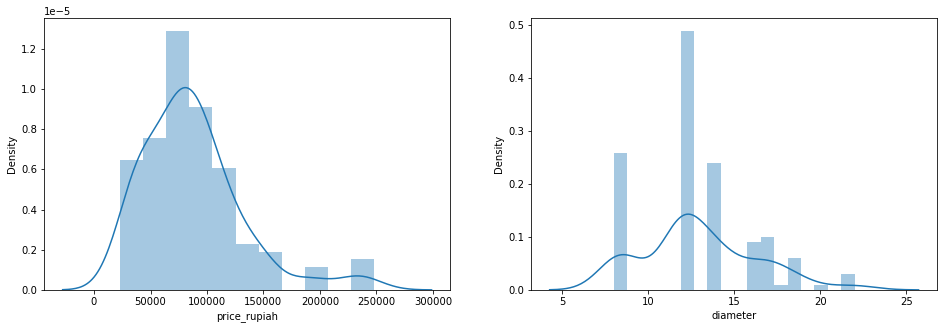

In [4]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['price_rupiah'])
plt.subplot(1,2,2)
sns.distplot(df['diameter'])
plt.show()

In [5]:
df['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked beef     19
tuna             9
vegetables       9
meat             8
black papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

In [6]:
df['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

In [7]:
df['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

In [8]:
df['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

Data Duplikat

In [9]:
print('Ada {} data duplikat'.format(len(df[df.duplicated()])))
df[df.duplicated(keep=False)]

Ada 3 data duplikat


,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
29,B,83000,17.0,chicken,new_york,XL,no,yes
47,B,83000,17.0,chicken,new_york,XL,no,yes
99,E,115000,17.0,mozzarella,new_york,XL,no,yes
104,E,83000,17.0,chicken,new_york,XL,no,yes
110,E,115000,17.0,mozzarella,new_york,XL,no,yes
122,E,83000,17.0,chicken,new_york,XL,no,yes


In [10]:
df.drop_duplicates(keep='first', inplace=True)

In [11]:
print('Ada {} data duplikat'.format(len(df[df.duplicated()])))
df[df.duplicated(keep=False)]

Ada 0 data duplikat


,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese


Data Outliers

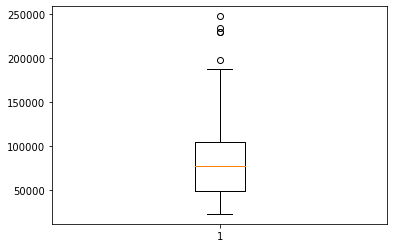

<Figure size 720x504 with 0 Axes>

In [12]:
plt.boxplot(df['price_rupiah'])
fig = plt.figure(figsize =(10, 7))
plt.show()

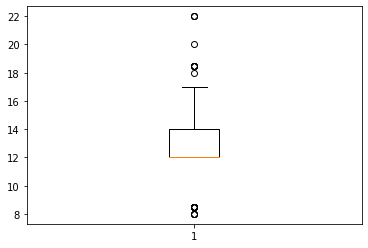

<Figure size 720x504 with 0 Axes>

In [13]:
plt.boxplot(df['diameter'])
fig=plt.figure(figsize=(10,7))
plt.show()

Karna Tidak Terlalu banyak Outlier <br>
Penghapusan Outlier Tidak diperlukan <br>
Karna total datasetnya hanya Sedikit

Data Kosong

In [14]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

Tidak Ada data Kosong

Encoding Data

In [15]:
df['size'].replace(['small','medium','reguler','large','XL','jumbo'],[1,2,3,4,5,6], inplace=True)

Karna Datanya bersifat Order/Urutan Ukuran <br>
jadi saya ingin menentukan nomor valuenya <br>
Berdasarkan ukuran sesuai produk yang beredar di pasaran<br>
dengan urutan sebagai berikut: <br>
small,medium,reguler,large,XL,jumbo

In [16]:
df['size'].value_counts().sort_index()

1    22
2    41
3    20
4    21
5     7
6    15
Name: size, dtype: int64

In [17]:
le=LabelEncoder()
le.fit(df['variant'])
df['variant']=le.transform(df['variant'])
le.fit(df['topping'])
df['topping']=le.transform(df['topping'])
le.fit(df['company']) 
df['company']=le.transform(df['company'])

In [18]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,235000,22.0,2,8,6,yes,yes
1,0,198000,20.0,7,8,6,yes,yes
2,0,120000,16.0,5,8,3,yes,yes
3,0,155000,14.0,9,8,3,yes,no
4,0,248000,18.0,4,8,6,yes,no
...,...,...,...,...,...,...,...,...
124,4,39000,8.5,10,16,1,yes,yes
125,4,72000,12.0,10,16,2,yes,yes
126,4,99000,14.0,10,16,4,yes,yes
127,4,44000,8.5,3,0,1,yes,no


Menggunakan Label encoder <br>
karena kategorinya cukup banyak

In [19]:
df = pd.get_dummies(df, drop_first=True)
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce_yes,extra_cheese_yes
0,0,235000,22.0,2,8,6,1,1
1,0,198000,20.0,7,8,6,1,1
2,0,120000,16.0,5,8,3,1,1
3,0,155000,14.0,9,8,3,1,0
4,0,248000,18.0,4,8,6,1,0
...,...,...,...,...,...,...,...,...
124,4,39000,8.5,10,16,1,1,1
125,4,72000,12.0,10,16,2,1,1
126,4,99000,14.0,10,16,4,1,1
127,4,44000,8.5,3,0,1,1,0


Menggunakan Onehot Encoding karna hanyak memiliki 2 kategori

Check Correlation

<AxesSubplot:>

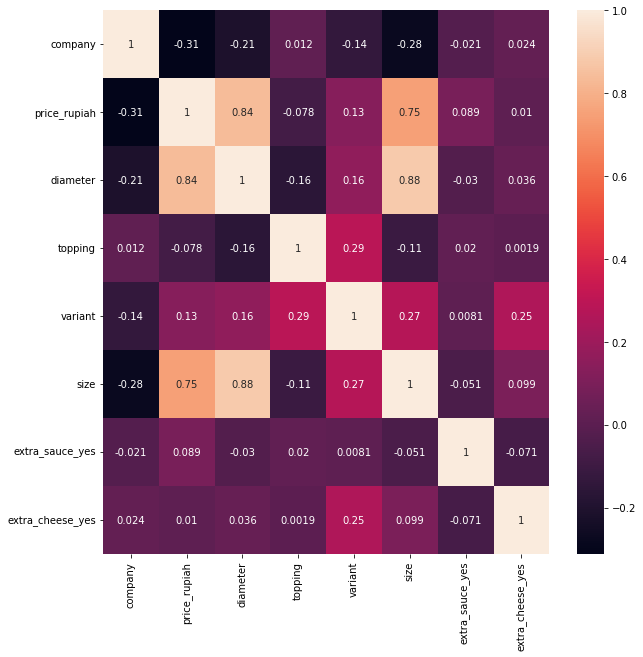

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

**Modeling**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from xgboost import XGBRegressor

In [22]:
X=df.drop(columns=['price_rupiah'])
y=df['price_rupiah']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Linear Regesion

In [23]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-4814.25127738 11537.55329226   955.51816349  -383.42095184
 -1534.53674218 11233.56790774  2623.65437313]
-57255.00529872833


In [24]:
pred_lin_reg = lin_reg.predict(X_test)

perbandingan = pd.DataFrame({
    'aktual': y_test,
    'prediksi': pred_lin_reg
})
perbandingan.sample(5)

,aktual,prediksi
45,72000,109463.953674
26,46000,84923.229874
40,76000,73306.241014
0,235000,200064.837671
31,31000,51566.538957


In [25]:
lin_regMAE=mae(y_test, pred_lin_reg)
lin_regRMSE=np.sqrt(mse(y_test, pred_lin_reg))
print("RMSE:  % f" %(lin_regRMSE))
print("MAE:  % f" %(lin_regMAE))
model1_score=lin_reg.score(X_test,y_test)

RMSE:   29780.612318
MAE:   22138.720689


Decision Tree

In [26]:
dt=DecisionTreeRegressor(max_depth=5) 
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
perbandingan = pd.DataFrame({
    'aktual': y_test,
    'prediksi': y_pred_dt
})
perbandingan.sample(5)

,aktual,prediksi
18,90000,75692.307692
19,90000,75692.307692
36,123000,132500.000000
56,72000,46000.000000
40,76000,65416.666667


In [27]:
dt_mae=mae(y_test,y_pred_dt)
dt_rmse=np.sqrt(mse(y_test,y_pred_dt))
print("RMSE : % f" %(dt_rmse))
print("MAE : % f" %(dt_mae))
model2_score=dt.score(X_test,y_test)

RMSE :  19004.523697
MAE :  13346.611722


In [28]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
import graphviz
from graphviz import Source
from IPython.display import display


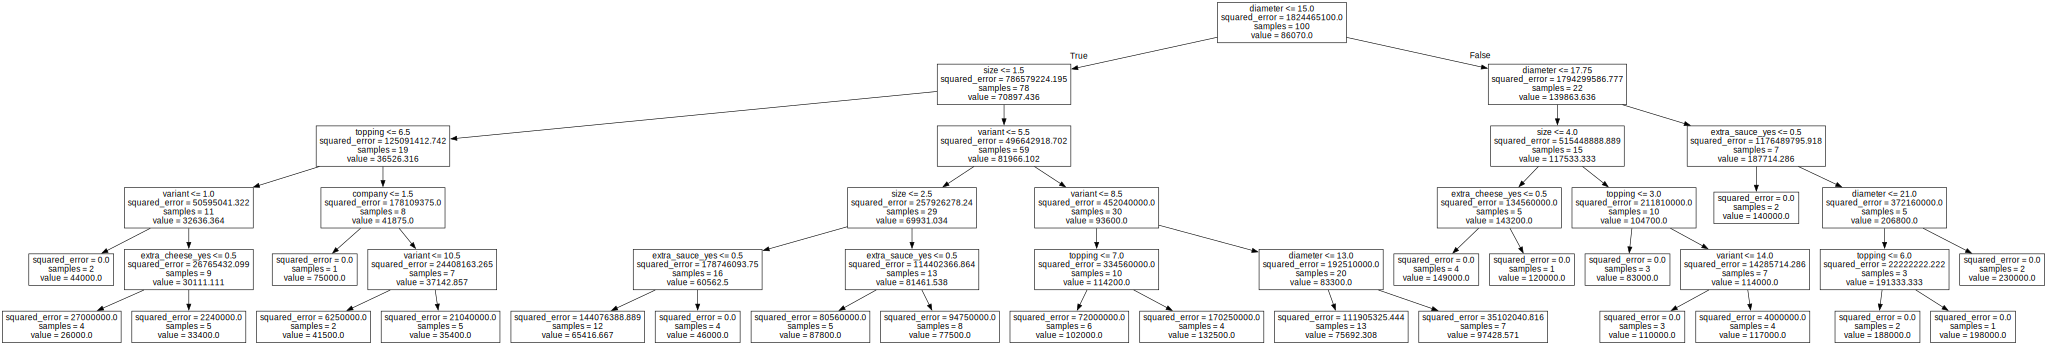

In [29]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns, filled=True, rounded=True)
graph = graphviz.Digraph(graph_attr={'size':'6,6'})
graph = graphviz.Source(dot_data)
graph.format = 'png'
display(graphviz.Source(export_graphviz(dt, out_file=None, feature_names=X_train.columns)))

In [30]:
xgb_r=XGBRegressor()
xgb_r.fit(X_train,y_train)
y_pred_xgb=xgb_r.predict(X_test)
perbandingan = pd.DataFrame({
    'aktual': y_test,
    'prediksi': y_pred_xgb
})
perbandingan.sample(5)

,aktual,prediksi
10,140000,151894.703125
4,248000,185891.140625
40,76000,73835.984375
26,46000,45892.285156
74,60000,60373.863281


In [31]:
xgb_mae=mae(y_test, y_pred_xgb)
xgb_rmse=np.sqrt(mse(y_test, y_pred_xgb))
print("RMSE : % f" %(xgb_rmse))
print("MAE : % f" %(xgb_mae))
model3_score=xgb_r.score(X_test, y_test)

RMSE :  14991.455932
MAE :  8515.159255


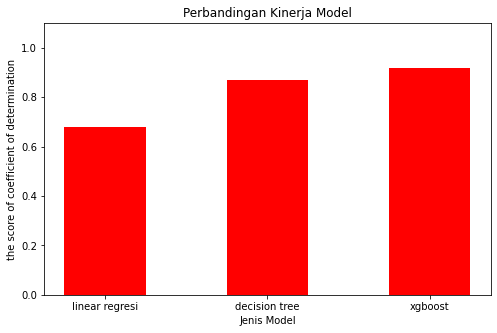

In [41]:
models = ['linear regresi', 'decision tree', 'xgboost']
values = [model1_score, model2_score, model3_score]

fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(models, values, color ='red',
        width = 0.5)

plt.ylim((0,1.1))
plt.xlabel("Jenis Model")
plt.ylabel("the score of coefficient of determination")
plt.title("Perbandingan Kinerja Model")
plt.show()

In [39]:
df_performance=pd.DataFrame(
{u'RMSE': {0: round(lin_regRMSE,2),1: round(dt_rmse,2),2:round(xgb_rmse,2)},
 u'MAE': {0: round(lin_regMAE,2),1: round(dt_mae,2),2:round(xgb_mae,2)},
 u'Algorithm': {0: u'Linear Regresion',1: u'Decision Tree',2: u'XGBoost'}})
df_performance = df_performance.set_index('Algorithm')

Text(0, 0.5, 'Performance')

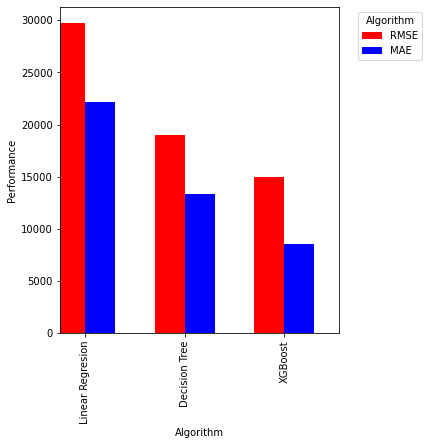

In [40]:
fig = plt.figure(figsize=(5,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .3

df_performance.RMSE.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_performance.MAE.plot(kind='bar', color='blue', ax=ax, width=width, position=0)

ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel('Performance')

In [33]:
print(model1_score)
print(model2_score)
print(model3_score)

0.6809787025353538
0.8700828723961939
0.9191574403270436


Kesimpulan Yang didapatkan<br>
Bahwa model Xgboost memiliki hasil<br>
Terbaik dibanding dengan Model lainya<br>
dengan Score Sebesar 91.91%<br>
Dan memiliki nilai RMSE dan MAE <br>
Lebih Kecil dari Model Lainya